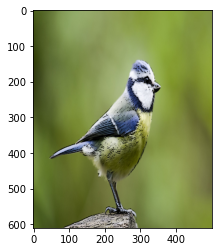

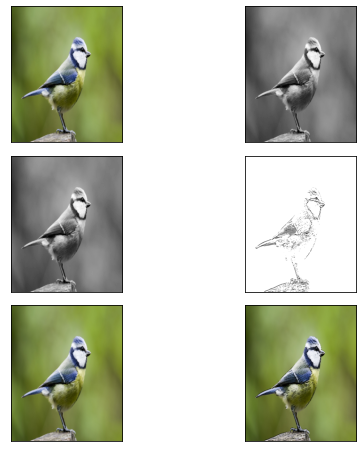

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Nur Afiqah\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "<ipython-input-2-9a380b421498>", line 131, in <lambda>
    save2 = Button(windows,text="Save sketch image",command=lambda: saveSketch( UploadImage,ResizeD),padx=30,pady=5)
  File "<ipython-input-2-9a380b421498>", line 164, in saveSketch
    path2 = os.path.join(path, newName1+extension)
TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'


In [2]:
import cv2 #to process the image
import easygui #to create interface
import numpy as np #to save image
import imageio #to read image stored in specific path
import sys
import matplotlib.pyplot as plot  # for image plotting
import os  # to read and save the process
import tkinter as tk # for tk interface
from tkinter import filedialog
from tkinter import *
from tkinter import messagebox
from tkinter import simpledialog
from PIL import ImageTk, Image

#generate window
windows=tk.Tk()
windows.geometry('1000x700')
windows.resizable(False,False)
windows.title('Turn any picture into cartoon !!')
windows.configure(background='light salmon')
label=Label(windows,background='#FFDFD3', font=('IBM Plex',26,'bold'))

# title 
title = Label(windows,text = "CARTOONIFY IMAGE",
font = "Helvetica 16 bold italic").pack()

save1 = Label(windows)
save2 = Label(windows)

def upload():
 
    UploadImage=easygui.fileopenbox()   # to open file in the computer for choosing picture
    convert(UploadImage)

    # the label for image name of the file uploaded
    basename = os.path.basename(UploadImage)
    image_name = Label(windows,text = "From Image : "+basename).place(x = 10,y = 150) 
    
def convert(UploadImage):    
    OriginalPicture=cv2.imread(UploadImage)  # read the image in codes
    OriginalPicture=cv2.cvtColor(OriginalPicture, cv2.COLOR_BGR2RGB) #convert the image from bgr to rgb to save the image correctly after being converted into codes
    
    if OriginalPicture is None:  # to check if the picture is uploaded or not
        print("Picture not found! Please choose the correct file")
        sys.exit()
    
    ResizeA=cv2.resize(OriginalPicture,(500,610))   # to resize the picture
    Resize1=cv2.resize(OriginalPicture,(225, 300))
    
    # convert image to grayscale by BGR2GRAY
    GrayScalePic = cv2.cvtColor( OriginalPicture , cv2.COLOR_BGR2GRAY)

    ResizeB = cv2.resize(GrayScalePic,(500,610)) #resize again 
    # to display original pic and the grayscale picture so we can compare it
    plot.imshow( ResizeB , cmap='gray')

    # for smoothening the gray scale picture by medianBlur
    GrayScaleSmoothening = cv2.medianBlur( GrayScalePic, 5 )

    ResizeC = cv2.resize(GrayScaleSmoothening , ( 500 , 610 ))
    # to display grayscale pic and the grayscale smoothening picture 
    plot.imshow( ResizeC , cmap='gray')

    #retrieving edges of picture using adaptiveThreshold
    RetrieveEgdePic = cv2.adaptiveThreshold( GrayScaleSmoothening, 255 , cv2.ADAPTIVE_THRESH_MEAN_C ,cv2.THRESH_BINARY, 9,9 )
 
    ResizeD = cv2.resize( RetrieveEgdePic , ( 500 , 610 ))
    Resize2=cv2.resize(RetrieveEgdePic,(225, 300))

    # to display grayscale pic and retrieved edge picture 
    plot.imshow( ResizeD , cmap='gray')

    #applying bilateral filter to remove noise 
    colorImage = cv2.bilateralFilter(OriginalPicture, 5, 256, 256)
    ResizeE = cv2.resize(colorImage, (500 , 610))
    plot.imshow(ResizeE, cmap='gray')

    #masking edged image with our "BEAUTIFY" image
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=RetrieveEgdePic)

    ResizeF = cv2.resize(cartoonImage, (500 , 610)) 
    Resize3 = cv2.resize(cartoonImage,(225, 300))
    plot.imshow(ResizeF, cmap='gray')

    # Plotting the whole transition
    images=[ResizeA, ResizeB, ResizeC, ResizeD, ResizeE, ResizeF]
    fig, axes = plot.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
    
    #display preview of images converted
    height, width, no_channels = Resize1.shape
    
    canvas = tk.Canvas(windows, width = width, height = height)
    canvas.place(relx=0.333, rely=0.5, anchor=E)
    
    img = ImageTk.PhotoImage(image = Image.fromarray(Resize1))
    canvas.create_image(2,2, image = img, anchor = tk.NW)
    windows.after(900000000, lambda: canvas.delete(img))
    
    canvas2 = tk.Canvas(windows, width = width, height = height)
    canvas2.place(relx=0.5, rely=0.5, anchor=CENTER)
    canvas2.config(highlightthickness=0)
    
    img2 = ImageTk.PhotoImage(image = Image.fromarray(Resize2))
    canvas2.create_image(2,2, image = img2, anchor = tk.NW)
    windows.after(900000000, lambda: canvas2.delete(img2))

    canvas3 = tk.Canvas(windows, width = width, height = height)
    canvas3.place(relx=0.666, rely=0.5, anchor=W)
    canvas3.config(highlightthickness=0)
    
    img3 = ImageTk.PhotoImage(image = Image.fromarray(Resize3))
    canvas3.create_image(2,2, image = img3, anchor = tk.NW)
    windows.after(900000000, lambda: canvas3.delete(img3))

    #show label for each image
    title_ori = Label(windows,text = "Original Image").place(x = 170,y = 200)
    title_sketch = Label(windows,text = "Sketched Image").place(x = 450,y = 200)
    title_cartoon = Label(windows,text = "Cartoonified Image").place(x = 730,y = 200)
    
    #create two save button 
    global save1,save2
    save1.destroy()
    save2.destroy()

    save1 = Button(windows,text="Save cartoon image",command=lambda: saveCartoon( UploadImage,ResizeF),padx=30,pady=5)
    save1.configure(background='#cc3383', foreground='white',font=('calibri',10,'bold'))
    save1.pack(anchor = S, side = "right", padx = 50, pady=100)

    save2 = Button(windows,text="Save sketch image",command=lambda: saveSketch( UploadImage,ResizeD),padx=30,pady=5)
    save2.configure(background='#cc3383', foreground='white',font=('calibri',10,'bold'))
    save2.pack(anchor = S, side = "right", padx = 50,pady=100)

    plot.show()

def saveCartoon( UploadImage,ResizeF):
    #saving a cartoon image using imwrite()
    #newName = "cartoonified_Image"
    
    #show a popup to name save image
    newName = simpledialog.askstring("Input", "Enter file name", parent=windows)
    
    #set image path        
    path = os.path.dirname(UploadImage)
    extension=os.path.splitext(UploadImage)[1]
    path1 = os.path.join(path, newName+extension)
    cv2.imwrite(path1, cv2.cvtColor(ResizeF, cv2.COLOR_RGB2BGR))
    
    I = "Image saved by name " + newName +" at "+ path1
    print(I)
    tk.messagebox.showinfo(title=None, message=I)

def saveSketch( UploadImage, ResizeD):
    #saving a sketch image using imwrite()
    #newName1 = "sketch_Image"
    
    #show a popup to name save image
    newName1 = simpledialog.askstring("Input", "Enter file name",parent=windows)
    
    #set image path
    path = os.path.dirname(UploadImage)
    extension=os.path.splitext(UploadImage)[1]
    path2 = os.path.join(path, newName1+extension)
    cv2.imwrite(path2, cv2.cvtColor(ResizeD, cv2.COLOR_RGB2BGR))
    
    k = "Image saved by name " + newName1 +" at "+ path2
    print(k)
    tk.messagebox.showinfo(title=None, message=k)
    

#create upload image button
upload = Button(windows,text="Upload Image",command=upload,padx=18,pady=8) 
upload.configure(background='brown4', foreground='white',font=('IBM Plex',10,'bold'))
upload.pack(side=TOP, anchor=NW,pady=50, padx=10)


windows.mainloop()   
